<a href="https://colab.research.google.com/github/primitiveFountainhead/SRCNN-down-scaling-of-summer-monsoon-rainfall/blob/main/SRCNN_for_rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

In [ ]:
from tqdm import tqdm
import xarray as xr
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## open dataset
high res is $1^o X 1^o$

high res is $.25^o X .25^o$

In [ ]:
rf_lower = xr.open_dataset('/content/rainfall_ind_2018_1d2.nc')
rf_lower.interpolate_na(dim="TIME", method="linear", fill_value="extrapolate")

<xarray.Dataset>
Dimensions:    (TIME: 365, LONGITUDE: 35, LATITUDE: 33)
Coordinates:
  * TIME       (TIME) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-12-31
  * LONGITUDE  (LONGITUDE) float64 66.5 67.5 68.5 69.5 ... 97.5 98.5 99.5 100.5
  * LATITUDE   (LATITUDE) float64 6.5 7.5 8.5 9.5 10.5 ... 35.5 36.5 37.5 38.5
Data variables:
    RAINFALL   (TIME, LATITUDE, LONGITUDE) float64 nan nan nan ... nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.7.1 (http://mpimet.mpg.d...
    Conventions:  CF-1.6
    history:      Mon Mar 28 13:52:21 2022: cdo setmissval,-999 ind2018_1384i...
    CDO:          Climate Data Operators version 1.9.7.1 (http://mpimet.mpg.d...

In [ ]:
rf_higher = xr.open_dataset('/content/rainfall_ind_2018_p25d2.nc')
rf_higher.interpolate_na(dim="TIME", method="linear", fill_value="extrapolate")

<xarray.Dataset>
Dimensions:    (LONGITUDE: 135, LATITUDE: 129, TIME: 365)
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 66.5 66.75 67.0 67.25 ... 99.5 99.75 100.0
  * LATITUDE   (LATITUDE) float64 6.5 6.75 7.0 7.25 ... 37.75 38.0 38.25 38.5
  * TIME       (TIME) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-12-31
Data variables:
    RAINFALL   (TIME, LATITUDE, LONGITUDE) float64 nan nan nan ... nan nan nan
Attributes:
    history:      FERRET V7.5 (optimized) 16-Mar-22
    Conventions:  CF-1.6

In [ ]:
rf_lower_data = rf_lower.RAINFALL
rf_higher_data = rf_higher.RAINFALL

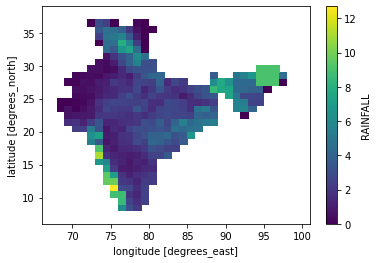

In [ ]:
rf_lower = rf_lower.where(rf_lower['RAINFALL'] != -999.) #Remove NaN values
rf_lower['RAINFALL'].mean('TIME').plot()

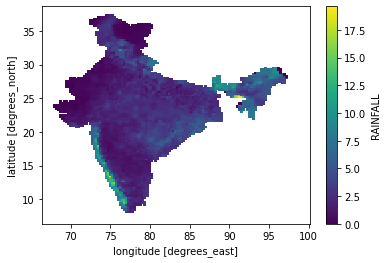

In [ ]:
rf_higher = rf_higher.where(rf_higher['RAINFALL'] != -999.) #Remove NaN values
rf_higher['RAINFALL'].mean('TIME').plot()

# Preproccesing

# Printing 20 random  rainfall data side by side

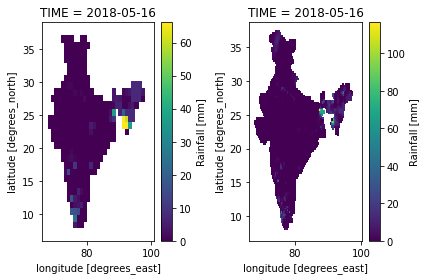

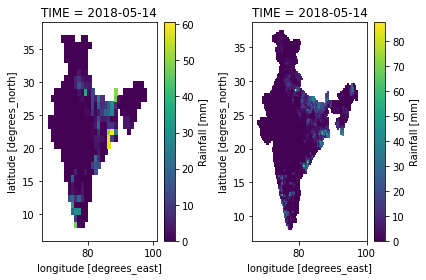

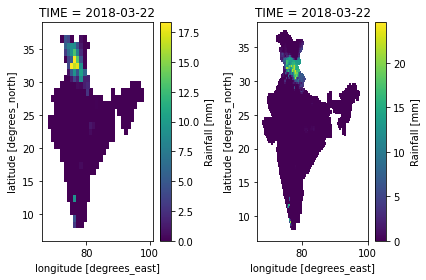

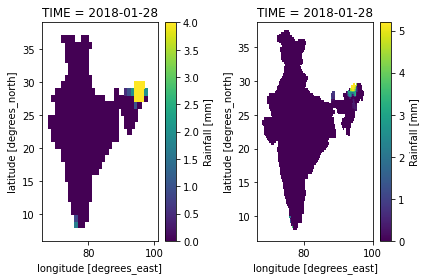

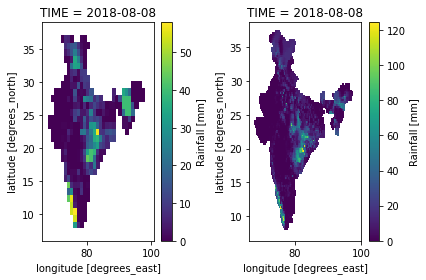

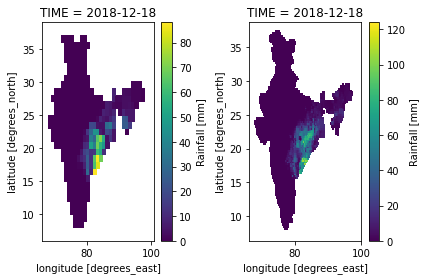

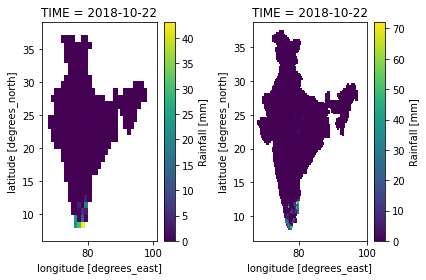

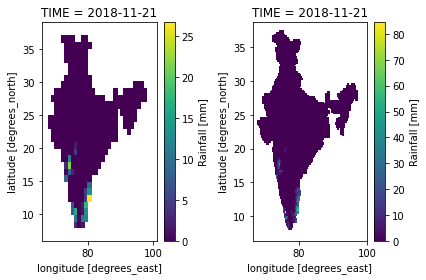

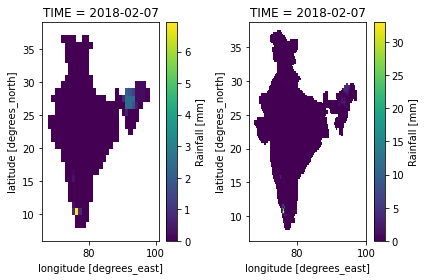

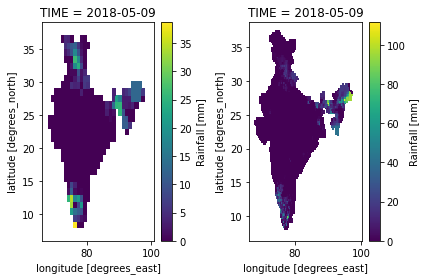

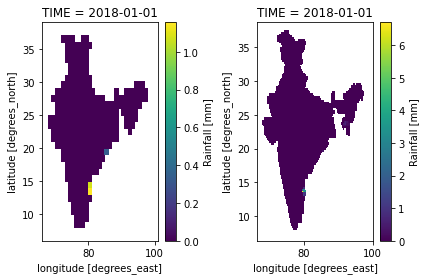

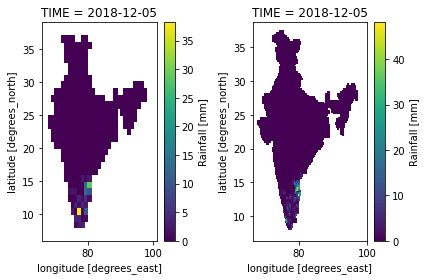

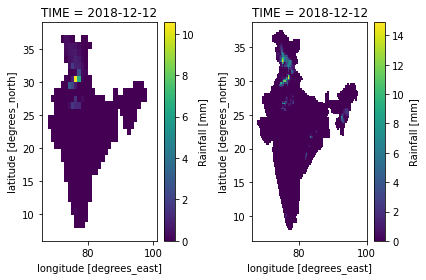

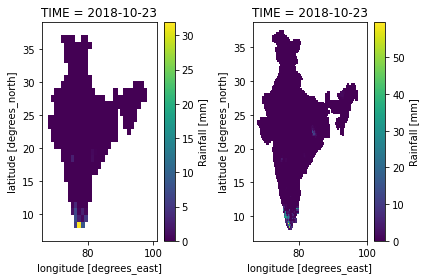

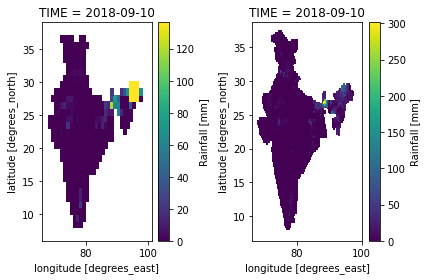

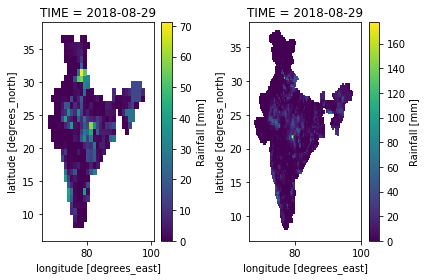

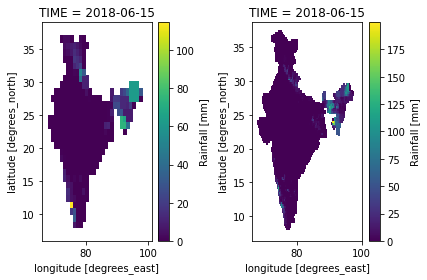

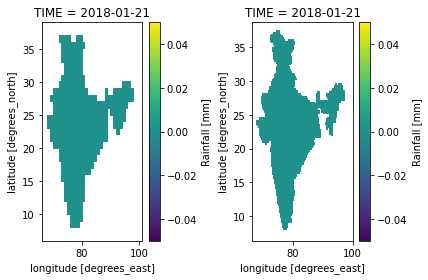

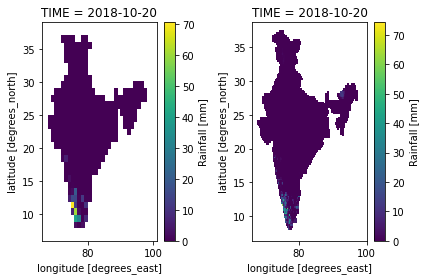

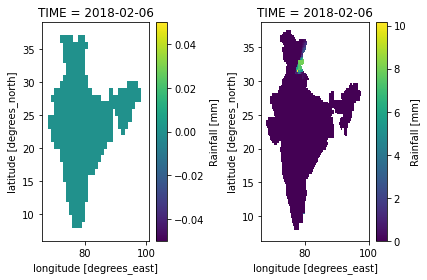

In [ ]:
time = rf_higher_data.TIME
for t in time[np.random.randint(0, len(time),20)]:
  fig, axes = plt.subplots(ncols=2)
  rf_higher_data.sel(TIME=t.values).plot(ax=axes[1])
  rf_lower_data.sel(TIME=t.values).plot(ax=axes[0])
  plt.tight_layout()
  plt.draw()

# Preprocesing

## Padding

In [ ]:
rf_lower_data.mean('TIME')

<xarray.DataArray 'RAINFALL' (LATITUDE: 33, LONGITUDE: 35)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 66.5 67.5 68.5 69.5 ... 97.5 98.5 99.5 100.5
  * LATITUDE   (LATITUDE) float64 6.5 7.5 8.5 9.5 10.5 ... 35.5 36.5 37.5 38.5

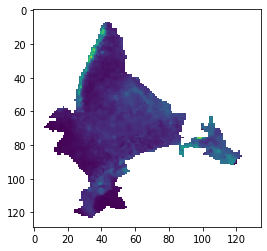

In [ ]:
data=rf_higher_data.mean('TIME')
plt.imshow(data)

In [ ]:
data=data.pad(LATITUDE=(int(np.ceil((140-129)/2)),int(np.floor((140-129)/2))))
data

<xarray.DataArray 'RAINFALL' (LATITUDE: 140, LONGITUDE: 135)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 66.5 66.75 67.0 67.25 ... 99.5 99.75 100.0
  * LATITUDE   (LATITUDE) float64 nan nan nan nan nan ... nan nan nan nan nan

In [ ]:
data=data.pad(LONGITUDE=(int(np.ceil((140-135)/2)),int(np.floor((140-135)/2))))
data

<xarray.DataArray 'RAINFALL' (LATITUDE: 140, LONGITUDE: 140)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 nan nan nan 66.5 ... 99.75 100.0 nan nan
  * LATITUDE   (LATITUDE) float64 nan nan nan nan nan ... nan nan nan nan nan

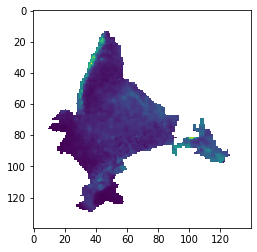

In [ ]:
plt.imshow(data)

In [ ]:
data.sizes

Frozen({'LATITUDE': 140, 'LONGITUDE': 140})

In [ ]:
def preprocessing_pad(xarr,width_lon, width_lat,c=-1):
  #pads xarray carr to have size width_lon and width_lat
  #get current lat and lon width
  lat_cur_width=xarr.sizes['LATITUDE']
  lon_cur_width=xarr.sizes['LONGITUDE']
  
  data  =xarr.fillna(c)-c
  
  #pad xarr
  data=data.pad(LATITUDE=(int(np.ceil((width_lat-lat_cur_width)/2)),int(np.floor((width_lat-lat_cur_width)/2))))
  data=data.pad(LONGITUDE=(int(np.ceil((width_lon-lon_cur_width)/2)),int(np.floor((width_lon-lon_cur_width)/2))))
  data = data.fillna(0)
  return data


In [ ]:
data=rf_higher_data.max('TIME')

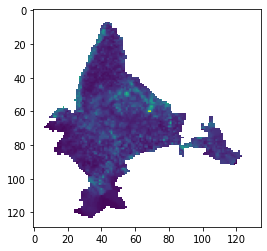

In [ ]:
plt.imshow(data)

In [ ]:
data=preprocessing_pad(data,140, 140)
data

<xarray.DataArray 'RAINFALL' (LATITUDE: 140, LONGITUDE: 140)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 nan nan nan 66.5 ... 99.75 100.0 nan nan
  * LATITUDE   (LATITUDE) float64 nan nan nan nan nan ... nan nan nan nan nan

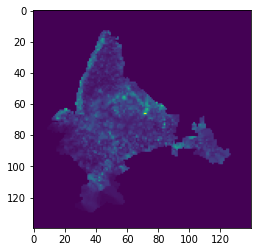

In [ ]:
plt.imshow(data)

# SRCNN - code

In [ ]:
import os
import typing
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model

In [ ]:
def SRCNN(input_shape: typing.Tuple[int], scale: int) -> Model:

    # input has single channel 
    X_input = layers.Input(input_shape, name = 'Input_Layer')
    X = layers.UpSampling2D(scale, name = 'UpSampling_Layer', data_format = 'channels_last')(X_input)
    
    X = layers.Conv2D(64, (9, 9), padding='same', name = 'Conv_1', data_format = 'channels_last')(X)
    X = layers.PReLU()(X)
    X = layers.BatchNormalization(name = 'BN_1')(X)

    X = layers.Conv2D(32, (1, 1), padding='same', name = 'Conv_2', data_format = 'channels_last')(X) 
    X = layers.PReLU()(X)   
    X = layers.BatchNormalization(name = 'BN_2')(X)

    X = layers.Conv2D(1, (5, 5), activation='relu', padding='same', name = 'Conv_3', data_format = 'channels_last')(X)

    model = Model(inputs = X_input, outputs = X)
    return model

In [ ]:
srcnn_model=SRCNN((35,35,1),4)
srcnn_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, 35, 35, 1)]       0         
                                                                 
 UpSampling_Layer (UpSamplin  (None, 140, 140, 1)      0         
 g2D)                                                            
                                                                 
 Conv_1 (Conv2D)             (None, 140, 140, 64)      5248      
                                                                 
 p_re_lu_4 (PReLU)           (None, 140, 140, 64)      1254400   
                                                                 
 BN_1 (BatchNormalization)   (None, 140, 140, 64)      256       
                                                                 
 Conv_2 (Conv2D)             (None, 140, 140, 32)      2080      
                                                           

# Train

## Convert data to an array

In [ ]:
rf_lower_data

<xarray.DataArray 'RAINFALL' (TIME: 365, LATITUDE: 33, LONGITUDE: 35)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * TIME       (TIME) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-12-31
  * LONGITUDE  (LONGITUDE) float64 66.5 67.5 68.5 69.5 ... 97.5 98.5 99.5 100.5
  * LATITUDE   (LATITUDE) float64 6.5 7.5 8.5 9.5 10.5 ... 35.5 36.5 37.5 38.5
Attributes:
    long_name:  Rainfall
    units:      mm
    history:    From ind2018_1384i.grd

In [ ]:
rf_higher_data

<xarray.DataArray 'RAINFALL' (TIME: 365, LATITUDE: 129, LONGITUDE: 135)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 66.5 66.75 67.0 67.25 ... 99.5 99.75 100.0
  * LATITUDE   (LATITUDE) float64 6.5 6.75 7.0 7.25 ... 37.75 38.0 38.25 38.5
  * TIME       (TIME) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-12-31
Attributes:
    long_name:  Rainfall
    units:      mm
    history:    From ind2018_rfp25.grd

SRCNN requires an array of image like data, so we convert xarray to the same

In [ ]:
dh = preprocessing_pad(rf_higher_data.sel(TIME=time[0]),140,140).values
dg = dh[...,np.newaxis]
dg.shape

(140, 140, 1)

In [ ]:
time = rf_higher_data.TIME
data_high = []
data_low=[]
#To add padding at preprocessing
scale=4
low_fin=35
high_fin=low_fin*scale
for t in tqdm(time):
  dh = preprocessing_pad(rf_higher_data.sel(TIME=t),high_fin,high_fin).values
  dh = dh[...,np.newaxis]
  data_high.append(dh)

  dl = preprocessing_pad(rf_lower_data.sel(TIME=t),low_fin,low_fin).values
  dl = dl[...,np.newaxis]
  data_low.append(dl)


data_high=np.array(data_high)
data_low=np.array(data_low)
print("\ndata_high shape = " , data_high.shape)
print("data_low shape = " , data_low.shape)

100%|██████████| 365/365 [00:02<00:00, 125.25it/s]



data_high shape =  (365, 140, 140, 1)
data_low shape =  (365, 35, 35, 1)


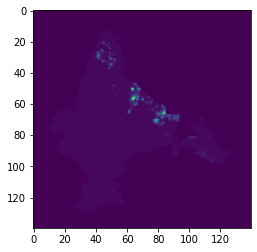

In [ ]:
plt.imshow(data_high[90,:,:,0])

## Get train and test dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_low, data_high, test_size=0.25, random_state=42)

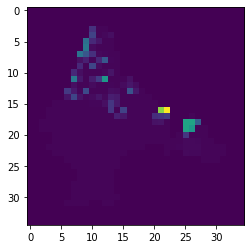

In [ ]:
plt.imshow(X_train[0,:,:,0])

Ploting first 3 train data

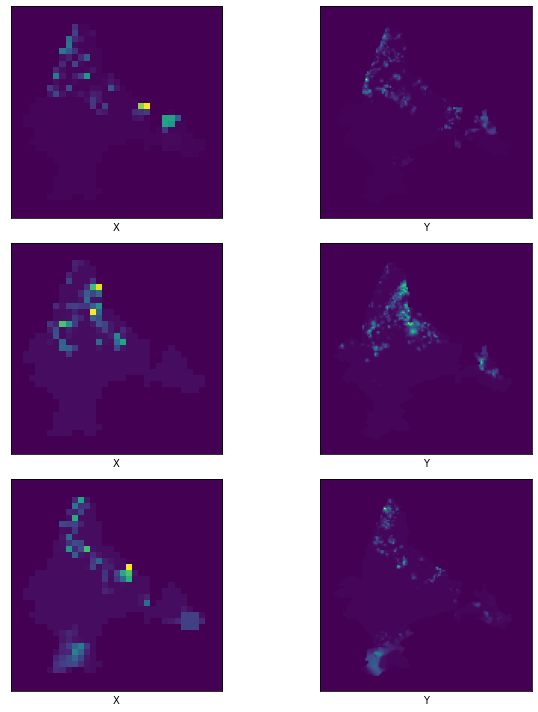

In [ ]:

plt.figure(figsize=(10,10))
i = 1
img_num=3
for t in range(img_num):
  plt.subplot(img_num,2,i)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[t,:,:,0])
  plt.xlabel("X")

  i+=1
  plt.subplot(img_num,2,i)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(y_train[t,:,:,0])
  plt.xlabel("Y")
  i+=1

plt.tight_layout()
plt.show()

ploting first 3 test data

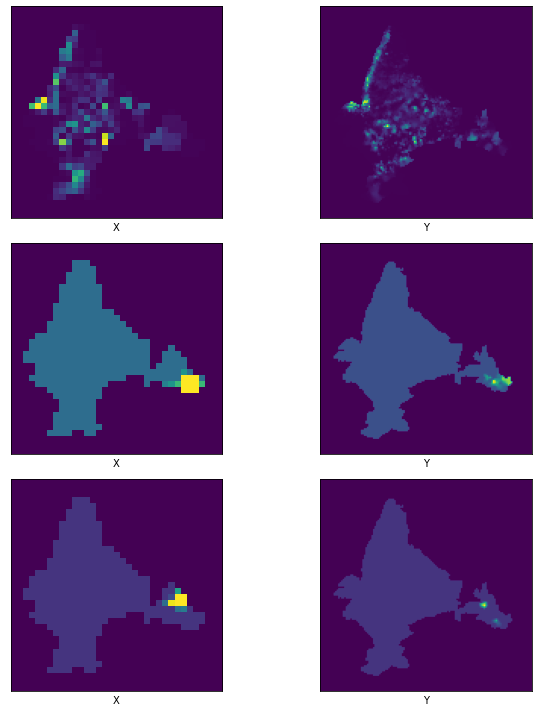

In [ ]:

plt.figure(figsize=(10,10))
i = 1
img_num=3
for t in range(img_num):
  plt.subplot(img_num,2,i)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_test[t,:,:,0])
  plt.xlabel("X")

  i+=1
  plt.subplot(img_num,2,i)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(y_test[t,:,:,0])
  plt.xlabel("Y")
  i+=1

plt.tight_layout()
plt.show()

## Train model

In [ ]:
EPOCHS = 12
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3, decay=1e-3 / EPOCHS)
srcnn_model=SRCNN((35,35,1),4)
srcnn_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, 35, 35, 1)]       0         
                                                                 
 UpSampling_Layer (UpSamplin  (None, 140, 140, 1)      0         
 g2D)                                                            
                                                                 
 Conv_1 (Conv2D)             (None, 140, 140, 64)      5248      
                                                                 
 p_re_lu_6 (PReLU)           (None, 140, 140, 64)      1254400   
                                                                 
 BN_1 (BatchNormalization)   (None, 140, 140, 64)      256       
                                                                 
 Conv_2 (Conv2D)             (None, 140, 140, 32)      2080      
                                                           

In [ ]:
srcnn_model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=optimizer,metrics=['accuracy'])

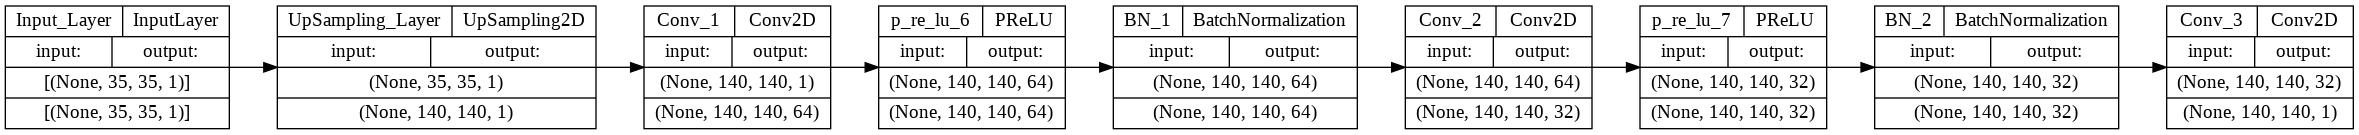

In [ ]:
tf.keras.utils.plot_model(srcnn_model, show_shapes = True, rankdir='LR')

In [ ]:
history = srcnn_model.fit(X_train, y_train, epochs=EPOCHS, 
                    validation_data=(X_test, y_test))

Epoch 1/12
9/9 [==============================] - 45s 5s/step - loss: 21.9680 - accuracy: 0.7885 - val_loss: 42.4204 - val_accuracy: 0.8601
Epoch 2/12
9/9 [==============================] - 44s 5s/step - loss: 13.9412 - accuracy: 0.8939 - val_loss: 44.4959 - val_accuracy: 0.8628
Epoch 3/12
9/9 [==============================] - 43s 5s/step - loss: 12.0508 - accuracy: 0.9116 - val_loss: 38.4067 - val_accuracy: 0.8765
Epoch 4/12
9/9 [==============================] - 44s 5s/step - loss: 11.7906 - accuracy: 0.9169 - val_loss: 31.2027 - val_accuracy: 0.8900
Epoch 5/12
9/9 [==============================] - 43s 5s/step - loss: 11.6710 - accuracy: 0.9082 - val_loss: 22.7816 - val_accuracy: 0.9007
Epoch 6/12
9/9 [==============================] - 43s 5s/step - loss: 11.1291 - accuracy: 0.9146 - val_loss: 20.2417 - val_accuracy: 0.9046
Epoch 7/12
9/9 [==============================] - 43s 5s/step - loss: 11.4654 - accuracy: 0.8976 - val_loss: 18.1393 - val_accuracy: 0.9079
Epoch 8/12
9/9 [====

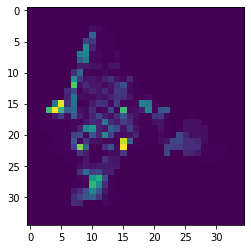

In [ ]:
plt.imshow(X_test[0,:,:,0])

In [ ]:
out = srcnn_model.predict(X_test[56].reshape(1,35, 35, 1))

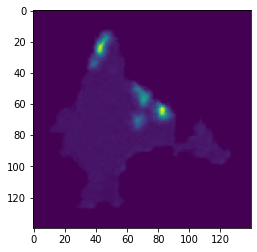

In [ ]:
plt.imshow(out[0,:,:,0])

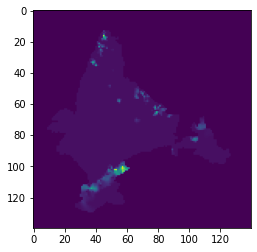

In [ ]:
plt.imshow(y_test[56,:,:,0])

# post processing

In [ ]:
def post_processing(xarr,c=-999):
  data = xarr +c
  data[data == c] = np.nan
  return data


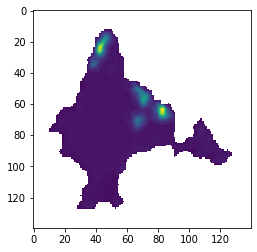

In [ ]:
plt.imshow(post_processing(out)[0,:,:,0])

# Testing

In [ ]:
i = 145
C = -999

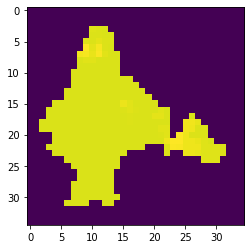

In [ ]:
data_in = preprocessing_pad(rf_lower.RAINFALL[i],35,35,c=C).values
plt.imshow(data_in)

In [ ]:
out = srcnn_model.predict(data_in.reshape(1,35, 35, 1))

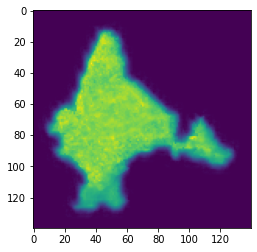

In [ ]:
plt.imshow(out[0,:,:,0])

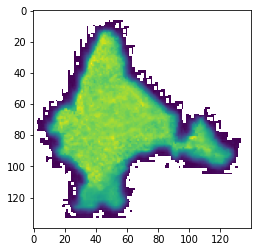

In [ ]:
plt.imshow(post_processing(out,c=C)[0,:,:,0])

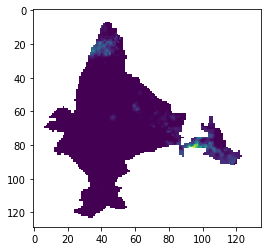

In [ ]:
plt.imshow(rf_higher.RAINFALL[i])